# Carregar bibliotecas

In [ ]:
"""
Sentiment Analysis - Data Preparation Script
B2W-Reviews01 Dataset

Este script realiza:
1. Carregamento dos dados (JSON)
2. Exploração (EDA) - Análise descritiva
3. Mapeamento de ratings para sentimentos
4. Limpeza de texto
5. Salvamento do dataset limpo
"""

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import warnings
import os

warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Todas as bibliotecas importadas com sucesso!")

✅ Todas as bibliotecas importadas com sucesso!


# CARREGAR DADOS JSON

In [ ]:
print("CARREGAR DADOS JSON")
print("="*80)

json_file = '../datasets/reviews.json'

print(f"\n📁 Carregando arquivo: {json_file}")

with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Converter para DataFrame
df = pd.DataFrame(data)

print(f"✅ Dados carregados com sucesso!")
print(f"\n📊 Informações básicas:")
print(f"   Total de registros: {len(df):,}")
print(f"   Total de colunas: {len(df.columns)}")
print(f"\n📋 Colunas:")
print(df.columns.tolist())

CARREGAR DADOS JSON

📁 Carregando arquivo: ../datasets/reviews.json
✅ Dados carregados com sucesso!

📊 Informações básicas:
   Total de registros: 132,373
   Total de colunas: 14

📋 Colunas:
['submission_date', 'reviewer_id', 'product_id', 'product_name', 'product_brand', 'site_category_lv1', 'site_category_lv2', 'review_title', 'overall_rating', 'recommend_to_a_friend', 'review_text', 'reviewer_birth_year', 'reviewer_gender', 'reviewer_state']


# EXPLORAÇÃO INICIAL DOS DADOS

EXPLORAÇÃO INICIAL (EDA)

🔍 Primeiras 5 linhas:
       submission_date                                        reviewer_id  \
0  2018-01-01 00:11:28  d0fb1ca69422530334178f5c8624aa7a99da47907c44de...   
1  2018-01-01 00:13:48  014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...   
2  2018-01-01 00:26:02  44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...   
3  2018-01-01 00:35:54  ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...   
4  2018-01-01 01:00:28  7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...   

  product_id                                       product_name  \
0  132532965  Notebook Asus Vivobook Max X541NA-GO472T Intel...   
1   22562178               Copo Acrílico Com Canudo 500ml Rocie   
2  113022329  Panela de Pressão Elétrica Philips Walita Dail...   
3  113851581               Betoneira Columbus - Roma Brinquedos   
4  131788803  Smart TV LED 43" LG 43UJ6525 Ultra HD 4K com C...   

    product_brand      site_category_lv1       site_category_lv2  \
0            None 

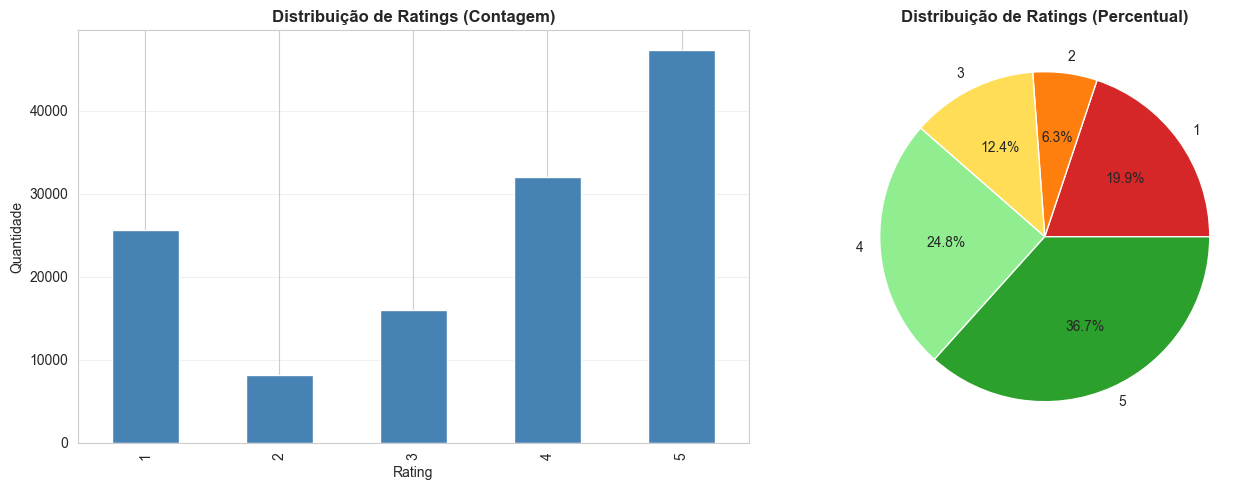


✅ Gráfico de ratings exibido!

📝 Exploração do TEXTO:
--------------------------------------------------------------------------------

📏 Comprimento dos textos (caracteres):
   Mínimo: 50 caracteres
   Máximo: 4548 caracteres
   Média: 136.76 caracteres
   Mediana: 95.00 caracteres

📊 Número de palavras:
   Mínimo: 1 palavras
   Máximo: 795 palavras
   Média: 23.02 palavras
   Mediana: 16.00 palavras

🔍 EXEMPLOS DE REVIEWS POR RATING:

⭐ Rating 1:
   "MEU PRODUTO NAO FOI ENTREGUE E A AMERICANAS ESTA DESCONTANDO NA FATURA DO MEU CARTÃO..."

⭐ Rating 2:
   "a mochila nao esta fechando direito por isso nao recomendo se meu filho nao tivesse deixado suja ia devolver..."

⭐ Rating 3:
   "A capa não decepcionou por enquanto, mas a bolsa para guarda ou transporte é extremamente frágil, na abertura para conferência já rasgou toda a volta ..."

⭐ Rating 4:
   "Estou contente com a compra entrega rápida o único problema com as Americanas é se houver troca ou devolução do produto o consumidor t

In [ ]:
print("EXPLORAÇÃO INICIAL (EDA)")
print("="*80)

# Visualizar primeiras linhas
print(f"\n🔍 Primeiras 5 linhas:")
print(df.head())

print(f"\n📈 Info do DataFrame:")
print("-"*80)
df.info()

# Verificar valores nulos
print(f"\n🔍 Valores nulos por coluna ANTES da limpeza:")
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df) * 100).round(2)

null_df = pd.DataFrame({
    'Coluna': null_counts.index,
    'Nulos': null_counts.values,
    'Percentual': null_percent.values
})
print(null_df.to_string(index=False))

# Remover APENAS os registros em que sejam nulos: overall_rating, recommend_to_a_friend ou review_text
print(f"\n⚠️  Removendo registros com valores nulos nas colunas críticas...")
print(f"   Colunas a verificar: ['overall_rating', 'recommend_to_a_friend', 'review_text']")

initial_count = len(df)
df = df.dropna(subset=['overall_rating', 'recommend_to_a_friend', 'review_text'])
removed_count = initial_count - len(df)

print(f"\n✅ Limpeza de nulos concluída!")
print(f"   Registros removidos: {removed_count:,}")
print(f"   Registros restantes: {len(df):,}")
print(f"   Percentual mantido: {len(df)/initial_count*100:.2f}%")

# Verificar valores nulos DEPOIS da limpeza (apenas nas 3 colunas críticas)
print(f"\n🔍 Valores nulos nas colunas críticas DEPOIS da limpeza:")
critical_cols = ['overall_rating', 'recommend_to_a_friend', 'review_text']
null_counts_critical = df[critical_cols].isnull().sum()
null_percent_critical = (null_counts_critical / len(df) * 100).round(2)

null_df_critical = pd.DataFrame({
    'Coluna': null_counts_critical.index,
    'Nulos': null_counts_critical.values,
    'Percentual': null_percent_critical.values
})
print(null_df_critical.to_string(index=False))

# Verificar todas as colunas DEPOIS da limpeza (para informação)
print(f"\n🔍 Valores nulos em TODAS as colunas DEPOIS da limpeza:")
null_counts_after = df.isnull().sum()
null_percent_after = (null_counts_after / len(df) * 100).round(2)

null_df_after = pd.DataFrame({
    'Coluna': null_counts_after.index,
    'Nulos': null_counts_after.values,
    'Percentual': null_percent_after.values
})
print(null_df_after.to_string(index=False))

# Exploração da coluna 'rating'
print(f"\n📊 Distribuição de RATINGS:")
print("-"*80)

rating_counts = df['overall_rating'].value_counts().sort_index()
print(rating_counts)

print(f"\n📈 Estatísticas:")
print(f"   Mínimo: {df['overall_rating'].min()}")
print(f"   Máximo: {df['overall_rating'].max()}")
print(f"   Média: {df['overall_rating'].mean():.2f}")
print(f"   Mediana: {df['overall_rating'].median():.2f}")
print(f"   Desvio Padrão: {df['overall_rating'].std():.2f}")

# Gráfico de distribuição de ratings - EXIBIDO NO NOTEBOOK
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Contagem
rating_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribuição de Ratings (Contagem)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Quantidade')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Percentual
rating_percent = (rating_counts / len(df) * 100)
rating_percent.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                   colors=['#d62728', '#ff7f0e', '#ffdd57', '#90ee90', '#2ca02c'])
axes[1].set_title('Distribuição de Ratings (Percentual)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()
print(f"\n✅ Gráfico de ratings exibido!")

# Exploração da coluna 'review_text'
print(f"\n📝 Exploração do TEXTO:")
print("-"*80)

# Comprimento dos textos
df['text_length'] = df['review_text'].str.len()
df['word_count'] = df['review_text'].str.split().str.len()

print(f"\n📏 Comprimento dos textos (caracteres):")
print(f"   Mínimo: {df['text_length'].min()} caracteres")
print(f"   Máximo: {df['text_length'].max()} caracteres")
print(f"   Média: {df['text_length'].mean():.2f} caracteres")
print(f"   Mediana: {df['text_length'].median():.2f} caracteres")

print(f"\n📊 Número de palavras:")
print(f"   Mínimo: {df['word_count'].min()} palavras")
print(f"   Máximo: {df['word_count'].max()} palavras")
print(f"   Média: {df['word_count'].mean():.2f} palavras")
print(f"   Mediana: {df['word_count'].median():.2f} palavras")

# Exemplos de reviews
print(f"\n🔍 EXEMPLOS DE REVIEWS POR RATING:")
print("="*80)

for rating in sorted(df['overall_rating'].unique()):
    print(f"\n⭐ Rating {rating}:")
    sample = df[df['overall_rating'] == rating]['review_text'].iloc[0]
    print(f"   \"{sample[:150]}...\"")


# MAPEAR RATINGS → SENTIMENTOS

MAPEAR RATINGS → SENTIMENTOS (COM AJUSTE POR RECOMENDAÇÃO)

🔄 Ajustando ratings baseado em recomendação...
   Se 'Yes' → +1 estrela
   Se 'No'  → -1 estrela
✅ Ajuste de ratings concluído!

📊 Comparação de RATINGS (Original vs Ajustado):
   Rating Original  Rating Ajustado
1            25646            31016
2             8126             2563
3            16008             2507
4            31987            14871
5            47313            78123

📈 Estatísticas de ajuste:
   Registros ajustados: 57,547 (44.58%)
   Registros inalterados: 71,533 (55.42%)

🔍 EXEMPLOS DE AJUSTES REALIZADOS:

Exemplo 1:
   Recomendação: Yes
   Rating Original: 4 ⭐
   Rating Ajustado: 5 ⭐ (+ 1)

Exemplo 2:
   Recomendação: No
   Rating Original: 3 ⭐
   Rating Ajustado: 2 ⭐ (- 1)

Exemplo 3:
   Recomendação: Yes
   Rating Original: 3 ⭐
   Rating Ajustado: 4 ⭐ (+ 1)

Exemplo 4:
   Recomendação: Yes
   Rating Original: 4 ⭐
   Rating Ajustado: 5 ⭐ (+ 1)

Exemplo 5:
   Recomendação: Yes
   Rating Original: 4 ⭐

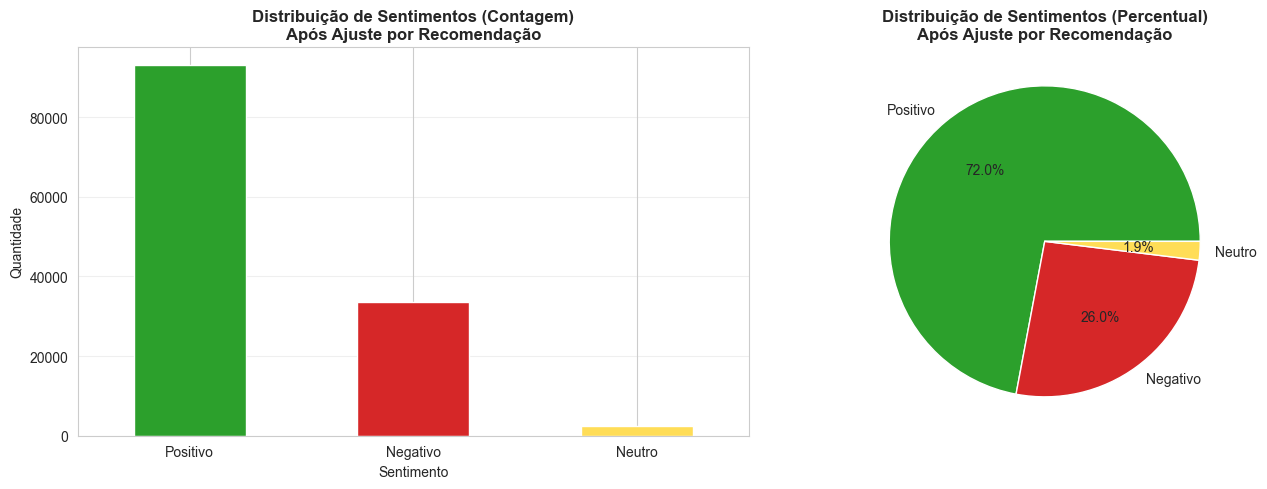


✅ Gráfico de sentimentos exibido!

📊 ANÁLISE COMPARATIVA - Impacto do Ajuste por Recomendação:
          Sentimento Original  Sentimento Ajustado
Positivo                79300                92994
Negativo                33772                33579
Neutro                  16008                 2507

📈 Mudanças de sentimento causadas pelo ajuste:
   Total de registros com mudança de sentimento: 18,515 (14.34%)


In [ ]:
print("MAPEAR RATINGS → SENTIMENTOS (COM AJUSTE POR RECOMENDAÇÃO)")
print("="*80)

def adjust_rating_by_recommendation(row):
    """
    Ajusta o rating baseado na coluna recommend_to_a_friend
    
    Se recommend_to_a_friend == "Yes" → adiciona 1 estrela
    Se recommend_to_a_friend == "No"  → remove 1 estrela
    Senão                             → mantém o rating original
    
    O rating final fica limitado entre 1 e 5
    """
    rating = row['overall_rating']
    recommendation = str(row['recommend_to_a_friend']).strip().lower()
    
    if recommendation == 'yes':
        rating = min(rating + 1, 5)  # Adiciona 1, máximo 5
    elif recommendation == 'no':
        rating = max(rating - 1, 1)  # Remove 1, mínimo 1
    
    return rating

# Criar coluna de rating ajustado
print(f"\n🔄 Ajustando ratings baseado em recomendação...")
print(f"   Se 'Yes' → +1 estrela")
print(f"   Se 'No'  → -1 estrela")

df['rating_adjusted'] = df.apply(adjust_rating_by_recommendation, axis=1)

print(f"✅ Ajuste de ratings concluído!")

# Comparar ratings originais vs ajustados
print(f"\n📊 Comparação de RATINGS (Original vs Ajustado):")
print("="*80)

comparison_df = pd.DataFrame({
    'Rating Original': df['overall_rating'].value_counts().sort_index(),
    'Rating Ajustado': df['rating_adjusted'].value_counts().sort_index()
}).fillna(0).astype(int)

print(comparison_df)

# Calcular quantas mudanças houve
print(f"\n📈 Estatísticas de ajuste:")
changed = (df['overall_rating'] != df['rating_adjusted']).sum()
unchanged = (df['overall_rating'] == df['rating_adjusted']).sum()

print(f"   Registros ajustados: {changed:,} ({changed/len(df)*100:.2f}%)")
print(f"   Registros inalterados: {unchanged:,} ({unchanged/len(df)*100:.2f}%)")

# Mostrar exemplos de ajustes
print(f"\n🔍 EXEMPLOS DE AJUSTES REALIZADOS:")
print("="*80)

adjustments = df[df['overall_rating'] != df['rating_adjusted']].sample(min(5, changed), random_state=42)

for idx, (i, row) in enumerate(adjustments.iterrows(), 1):
    recommendation = row['recommend_to_a_friend']
    original = int(row['overall_rating'])
    adjusted = int(row['rating_adjusted'])
    direction = "+" if adjusted > original else "-"
    
    print(f"\nExemplo {idx}:")
    print(f"   Recomendação: {recommendation}")
    print(f"   Rating Original: {original} ⭐")
    print(f"   Rating Ajustado: {adjusted} ⭐ ({direction} {abs(adjusted - original)})")

# Função para mapear ratings (agora usando rating_adjusted)
def map_rating_to_sentiment(rating):
    """
    Mapeia rating ajustado (1-5) para sentimento
    
    rating >= 4 → Positivo (5, 4)
    rating == 3 → Neutro
    rating <= 2 → Negativo (1, 2)
    """
    if rating >= 4:
        return 'Positivo'
    elif rating <= 2:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicar mapeamento usando o rating ajustado
print(f"\n🔄 Mapeando ratings ajustados para sentimentos...")
df['sentiment'] = df['rating_adjusted'].apply(map_rating_to_sentiment)

print(f"✅ Mapeamento concluído!")
print(f"\n📊 Distribuição de sentimentos (após ajuste por recomendação):")
print("="*80)

sentiment_counts = df['sentiment'].value_counts()
sentiment_percent = (df['sentiment'].value_counts(normalize=True) * 100).round(2)

sentiment_df = pd.DataFrame({
    'Sentimento': sentiment_counts.index,
    'Contagem': sentiment_counts.values,
    'Percentual': sentiment_percent.values
})
print(sentiment_df.to_string(index=False))

# Gráfico de distribuição de sentimentos - EXIBIDO NO NOTEBOOK
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Contagem
sentiment_counts.plot(kind='bar', ax=axes[0], color=[ '#2ca02c', '#d62728', '#ffdd57'])
axes[0].set_title('Distribuição de Sentimentos (Contagem)\nApós Ajuste por Recomendação', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sentimento')
axes[0].set_ylabel('Quantidade')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Percentual
sentiment_percent.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                       colors=['#2ca02c', '#d62728', '#ffdd57'])
axes[1].set_title('Distribuição de Sentimentos (Percentual)\nApós Ajuste por Recomendação', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()
print(f"\n✅ Gráfico de sentimentos exibido!")

# Análise comparativa: antes vs depois do ajuste
print(f"\n📊 ANÁLISE COMPARATIVA - Impacto do Ajuste por Recomendação:")
print("="*80)

# Criar dataframe com ratings originais mapeados
df['sentiment_original'] = df['overall_rating'].apply(map_rating_to_sentiment)

# Comparar
sentiment_comparison = pd.DataFrame({
    'Sentimento Original': df['sentiment_original'].value_counts(),
    'Sentimento Ajustado': df['sentiment'].value_counts()
}).fillna(0).astype(int)

print(sentiment_comparison)

print(f"\n📈 Mudanças de sentimento causadas pelo ajuste:")
changed_sentiment = (df['sentiment_original'] != df['sentiment']).sum()
print(f"   Total de registros com mudança de sentimento: {changed_sentiment:,} ({changed_sentiment/len(df)*100:.2f}%)")


# LIMPEZA DE TEXTO

In [ ]:
print("LIMPEZA DE TEXTO")
print("="*80)

def clean_text(text):
    """
    Limpa e normaliza o texto para análise
    
    Operações:
    1. Converter para lowercase
    2. Remover acentos
    3. Remover URLs
    4. Remover menções (@usuario)
    5. Remover hashtags (#hashtag)
    6. Remover números
    7. Remover caracteres especiais (mantém apenas letras, espaços)
    8. Remover espaços extras
    """
    
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remover menções (@usuario)
    text = re.sub(r'@\w+', '', text)
    
    # Remover hashtags (#hashtag) mantendo a palavra
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Remover números
    text = re.sub(r'\d+', '', text)
    
    # Remover acentos (normalização NFKD)
    text = unicodedata.normalize('NFKD', text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])
    
    # Remover caracteres especiais (manter apenas letras e espaços)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remover espaços extras
    text = ' '.join(text.split())
    
    return text

# Aplicar limpeza a toda a coluna
print(f"\n\n🧹 Limpando todos os textos...")
print(f"   Total de textos: {len(df):,}")

df['review_text_clean'] = df['review_text'].apply(clean_text)

print(f"✅ Limpeza concluída!")

# Remover textos vazios após limpeza
initial_count = len(df)
df = df[df['review_text_clean'].str.len() > 0]
removed_count = initial_count - len(df)

if removed_count > 0:
    print(f"⚠️  Removidos {removed_count:,} textos vazios após limpeza")
    print(f"   Registros restantes: {len(df):,}")
else:
    print(f"✅ Nenhum texto vazio encontrado")

# Visualizar comparação antes e depois
print(f"\n📊 Comparação ANTES e DEPOIS da limpeza:")
print("="*80)

samples = df.sample(5, random_state=42)

for idx, (i, row) in enumerate(samples.iterrows(), 1):
    print(f"\nExemplo {idx} (Rating: {row['overall_rating']} → Sentimento: {row['sentiment']}):")
    print(f"  ANTES:  {row['review_text'][:80]}...")
    print(f"  DEPOIS: {row['review_text_clean'][:80]}...")

LIMPEZA DE TEXTO


🧹 Limpando todos os textos...
   Total de textos: 129,080
✅ Limpeza concluída!
⚠️  Removidos 109 textos vazios após limpeza
   Registros restantes: 128,971

📊 Comparação ANTES e DEPOIS da limpeza:

Exemplo 1 (Rating: 3 → Sentimento: Positivo):
  ANTES:  Recebi o produto, porém faltou o puxado emburrachado que consta no imagem modelo...
  DEPOIS: recebi o produto porem faltou o puxado emburrachado que consta no imagem modelo ...

Exemplo 2 (Rating: 1 → Sentimento: Negativo):
  ANTES:  Comprei e usei uma única vez, o forno não funcionou mais. Estão demorando para f...
  DEPOIS: comprei e usei uma unica vez o forno nao funcionou mais estao demorando para faz...

Exemplo 3 (Rating: 5 → Sentimento: Positivo):
  ANTES:  Superou as minhas espectativas, muito bonito e bom......
  DEPOIS: superou as minhas espectativas muito bonito e bom...

Exemplo 4 (Rating: 2 → Sentimento: Neutro):
  ANTES:  Ainda não chegou esta demorando ja estou ficando sem paciência...
  DEPOIS: ainda 

# ANÁLISE DE QUALIDADE DOS DADOS LIMPOS

ANÁLISE DE QUALIDADE DOS DADOS LIMPOS

📏 Comprimento dos textos APÓS limpeza:
   Mínimo: 1 caracteres
   Máximo: 4133 caracteres
   Média: 130.29 caracteres
   Mediana: 91.00 caracteres

📊 Número de palavras APÓS limpeza:
   Mínimo: 1 palavras
   Máximo: 795 palavras
   Média: 22.65 palavras
   Mediana: 16.00 palavras


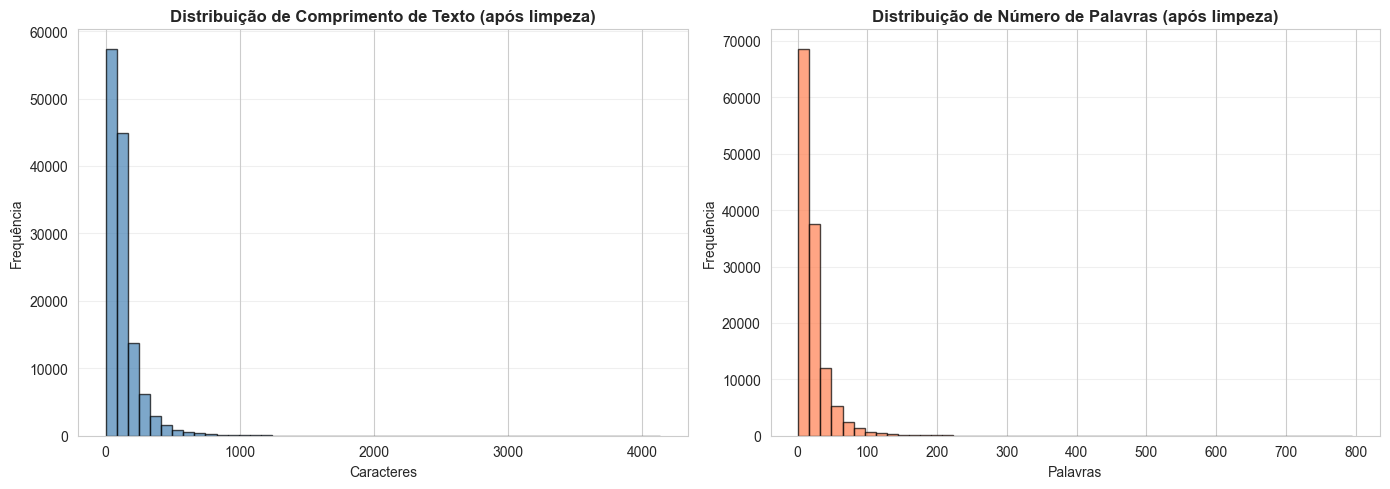


✅ Gráfico de qualidade do texto exibido!


In [ ]:
print("ANÁLISE DE QUALIDADE DOS DADOS LIMPOS")
print("="*80)

# Atualizar comprimento após limpeza
df['text_length_clean'] = df['review_text_clean'].str.len()
df['word_count_clean'] = df['review_text_clean'].str.split().str.len()

print(f"\n📏 Comprimento dos textos APÓS limpeza:")
print("="*60)
print(f"   Mínimo: {df['text_length_clean'].min()} caracteres")
print(f"   Máximo: {df['text_length_clean'].max()} caracteres")
print(f"   Média: {df['text_length_clean'].mean():.2f} caracteres")
print(f"   Mediana: {df['text_length_clean'].median():.2f} caracteres")

print(f"\n📊 Número de palavras APÓS limpeza:")
print(f"   Mínimo: {df['word_count_clean'].min()} palavras")
print(f"   Máximo: {df['word_count_clean'].max()} palavras")
print(f"   Média: {df['word_count_clean'].mean():.2f} palavras")
print(f"   Mediana: {df['word_count_clean'].median():.2f} palavras")

# Gráfico de distribuição de comprimento - EXIBIDO NO NOTEBOOK
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram: comprimento
axes[0].hist(df['text_length_clean'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição de Comprimento de Texto (após limpeza)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Caracteres')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.3)

# Histogram: número de palavras
axes[1].hist(df['word_count_clean'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribuição de Número de Palavras (após limpeza)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Palavras')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
print(f"\n✅ Gráfico de qualidade do texto exibido!")


# PREPARAR DATASET FINAL PARA MODELO

In [ ]:
print("PREPARAR DATASET FINAL PARA MODELO")
print("="*80)

# Selecionar apenas colunas necessárias
# Aqui optei por manter também o overall_rating original para análises futuras mais precisas
# e utilizei o rating_adjusted apenas para o mapeamento de sentimento
df_final = df[['review_text_clean', 'sentiment', 'overall_rating']].copy()

# Renomear coluna para facilitar uso no modelo
df_final = df_final.rename(columns={'review_text_clean': 'text', 'overall_rating': 'rating'})

# Dessa forma os campos do dataset final são:
# - text: texto limpo da review
# - sentiment: sentimento mapeado (Positivo, Negativo, Neutro)
# - rating: rating original (para análises futuras)

print(f"\n📋 Dataset final para modelo:")
print("="*60)
print(f"   Total de registros: {len(df_final):,}")
print(f"   Colunas: {df_final.columns.tolist()}")
print(f"\n   Distribuição de sentimentos:")
print(df_final['sentiment'].value_counts())
print(f"\n🔍 Primeiras 5 linhas:")
print(df_final.head())



PREPARAR DATASET FINAL PARA MODELO

📋 Dataset final para modelo:
   Total de registros: 128,971
   Colunas: ['text', 'sentiment', 'rating']

   Distribuição de sentimentos:
sentiment
Positivo    92894
Negativo    33571
Neutro       2506
Name: count, dtype: int64

🔍 Primeiras 5 linhas:
                                                text sentiment  rating
0  estou contente com a compra entrega rapida o u...  Positivo       4
1  por apenas reu consegui comprar esse lindo cop...  Positivo       4
2  supera em agilidade e praticidade outras panel...  Positivo       4
3  meu filho amou parece de verdade com tantos de...  Positivo       4
4  a entrega foi no prazo as americanas estao de ...  Positivo       5


# SALVAR DATASET LIMPO EM JSON

In [ ]:
print("SALVAR DATASET LIMPO")
print("="*80)

output_json = '../datasets/reviews_cleaned.json'

# Converter para JSON
print(f"\n💾 Salvando dataset limpo em JSON...")
print(f"   Arquivo: {output_json}")

df_final.to_json(
    output_json,
    orient='records',
    force_ascii=False,
    indent=2
)

print(f"✅ Dataset em JSON salvo com sucesso!")
print(f"   Tamanho: {os.path.getsize(output_json) / (1024**2):.2f} MB")
print(f"   Registros: {len(df_final):,}")


# Verificar integridade do JSON salvo
print(f"\n🔍 Verificando integridade do JSON...")

with open(output_json, 'r', encoding='utf-8') as f:
    verify_data = json.load(f)

print(f"✅ JSON válido!")
print(f"   Registros carregados: {len(verify_data):,}")
print(f"\n   Primeiro registro:")
print(json.dumps(verify_data[0], ensure_ascii=False, indent=2))


SALVAR DATASET LIMPO

💾 Salvando dataset limpo em JSON...
   Arquivo: ../datasets/reviews_cleaned.json
✅ Dataset em JSON salvo com sucesso!
   Tamanho: 24.26 MB
   Registros: 128,971

🔍 Verificando integridade do JSON...
✅ JSON válido!
   Registros carregados: 128,971

   Primeiro registro:
{
  "text": "estou contente com a compra entrega rapida o unico problema com as americanas e se houver troca ou devolucao do produto o consumidor tem problemas com espera",
  "sentiment": "Positivo",
  "rating": 4
}


# RESUMO FINAL

In [ ]:
print("✨ RESUMO DA PREPARAÇÃO DO DATASET")
print("="*80)

print(f"\n📊 ESTATÍSTICAS FINAIS:")
print(f"   • Total de registros: {len(df_final):,}")
print(f"   • Sentimentos:")
print(f"      - Positivo: {(df_final['sentiment'] == 'Positivo').sum():,} ({(df_final['sentiment'] == 'Positivo').sum()/len(df_final)*100:.1f}%)")
print(f"      - Negativo: {(df_final['sentiment'] == 'Negativo').sum():,} ({(df_final['sentiment'] == 'Negativo').sum()/len(df_final)*100:.1f}%)")
print(f"      - Neutro: {(df_final['sentiment'] == 'Neutro').sum():,} ({(df_final['sentiment'] == 'Neutro').sum()/len(df_final)*100:.1f}%)")

print(f"\n📁 ARQUIVOS GERADOS:")
print(f"   ✅ {output_json}")

print(f"\n🎯 PRÓXIMO PASSO:")
print(f"   Use o arquivo '{output_json}' para treinar o modelo de Logistic Regression + TF-IDF")

print(f"\n" + "="*80)
print("✅ PROCESSAMENTO COMPLETO!")
print("="*80)

✨ RESUMO DA PREPARAÇÃO DO DATASET

📊 ESTATÍSTICAS FINAIS:
   • Total de registros: 128,971
   • Sentimentos:
      - Positivo: 92,894 (72.0%)
      - Negativo: 33,571 (26.0%)
      - Neutro: 2,506 (1.9%)

📁 ARQUIVOS GERADOS:
   ✅ ../datasets/reviews_cleaned.json

🎯 PRÓXIMO PASSO:
   Use o arquivo '../datasets/reviews_cleaned.json' para treinar o modelo de Logistic Regression + TF-IDF

✅ PROCESSAMENTO COMPLETO!
